# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [438]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [439]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [440]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [441]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [442]:
# We have 5 dataframes.  Let's look at each of them for its shape, column names, and if thera are NaN and duplicates.
# for df_hh_income
print(f'\nShape of df_hh_income is {df_hh_income.shape}')
print(f'\tColumn names are {df_hh_income.columns}')
print(f'\tNaN values are {df_hh_income.isna().sum()}')
print(f'\tDuplicates are {df_hh_income.duplicated().sum()}')
print(f'\tDescribe df_hh_income: \n{df_hh_income.describe()}')

print(f'\nShape of df_pct_poverty are {df_pct_poverty.shape}')
print(f'\tColumn names are {df_pct_poverty.columns}')
print(f'\tNaN values are {df_pct_poverty.isna().sum()}')
print(f'\tDuplicates are {df_pct_poverty.duplicated().sum()}')
print(f'\tDescribe df_pct_poverty: \n{df_pct_poverty.describe()}')




Shape of df_hh_income is (29322, 3)
	Column names are Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
	NaN values are Geographic Area     0
City                0
Median Income      51
dtype: int64
	Duplicates are 0
	Describe df_hh_income: 
       Geographic Area           City Median Income
count            29322          29322         29271
unique              51          24249         14592
top                 PA  Franklin city           (X)
freq              1762             16          1113

Shape of df_pct_poverty are (29329, 3)
	Column names are Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
	NaN values are Geographic Area    0
City               0
poverty_rate       0
dtype: int64
	Duplicates are 0
	Describe df_pct_poverty: 
       Geographic Area           City poverty_rate
count            29329          29329        29329
unique              51          24255          771
top                 PA  Franklin city            0
freq         

In [443]:
print(f'\nShape of df_pct_completed_hs is {df_pct_completed_hs.shape}')
print(f'\tColumn names are {df_pct_completed_hs.columns}')
print(f'\tNaN values are {df_pct_completed_hs.isna().sum()}')
print(f'\tDuplicates are {df_pct_completed_hs.duplicated().sum()}')
print(f'\tDescribe df_pct_completed_hs: \n{df_pct_completed_hs.describe()}')

print(f'\nShape of df_share_race_city is {df_share_race_city.shape}')
print(f'\tColumn names are {df_share_race_city.columns}')
print(f'\tNaN values are {df_share_race_city.isna().sum()}')
print(f'\tDuplicates are {df_share_race_city.duplicated().sum()}')
print(f'\tDescribe df_share_race_city: \n{df_share_race_city.describe()}')




Shape of df_pct_completed_hs is (29329, 3)
	Column names are Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
	NaN values are Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
	Duplicates are 0
	Describe df_pct_completed_hs: 
       Geographic Area           City percent_completed_hs
count            29329          29329                29329
unique              51          24255                  728
top                 PA  Franklin city                  100
freq              1762             16                 1301

Shape of df_share_race_city is (29268, 7)
	Column names are Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
	NaN values are Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic      

In [444]:
print(f'\nShape of df_fatalities is {df_fatalities.shape}')
print(f'\tColumn names are {df_fatalities.columns}')
print(f'\tNaN values are {df_fatalities.isna().sum()}')
print(f'\tDuplicates are {df_fatalities.duplicated().sum()}')
print(f'\tDescribe df_fatalities: \n{df_fatalities.describe()}')




Shape of df_fatalities is (2535, 14)
	Column names are Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
	NaN values are id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
	Duplicates are 0
	Describe df_fatalities: 
            id      age
count 2,535.00 2,458.00
mean  1,445.73    36.61
std     794.26    13.03
min       3.00     6.00
25%     768.50    26.00
50%   1,453.00    34.00
75%   2,126.50    45.00
max   2,822.00    91.00


In [445]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [446]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [447]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [448]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [449]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [450]:
# These show that we have 3 values to replace:
df_hh_income[df_hh_income["Median Income"].isna()].count()
df_hh_income[df_hh_income["Median Income"] == "(X)"].count()
df_hh_income[df_hh_income["Median Income"] == "-"].count()

# Given the three items to match, let's get a new DF without those values
df_hh_inc = df_hh_income[~(df_hh_income["Median Income"].isna() | (df_hh_income["Median Income"] == "(X)") | (df_hh_income["Median Income"] == "-"))]

# Convert the "Median Income" column values of "2,500-" with "2500"
# df_hh_inc["Median Income"].str.contains("-").sum()
df_hh_inc.loc[df_hh_inc["Median Income"] == '2,500-', "Median Income"] = "2500"

# Similarly, those values with 250,000+ should be plain old 250000
df_hh_inc.loc[df_hh_inc["Median Income"] == '250,000+', "Median Income"] = "250000"

# Show the values of "Mediian Income" that contain a hyphen
# df_hh_inc[df_hh_inc["Median Income"].str.contains("-")]["Median Income"]

# Let's now get the median income
median_income = df_hh_inc["Median Income"].astype(int).mean()
median_income

# Now that we have a mean, let's go back to the original dataframe, df_hh_income, and replace all of the values with the mean
df_hh_income.loc[df_hh_income["Median Income"].isna(), "Median Income"] = median_income
df_hh_income.loc[df_hh_income["Median Income"] == "(X)", "Median Income"] = median_income
df_hh_income.loc[df_hh_income["Median Income"] == "-", "Median Income"] = median_income
df_hh_income.loc[df_hh_income["Median Income"] == '2,500-', "Median Income"] = 2500
df_hh_income.loc[df_hh_income["Median Income"] == '250,000+', "Median Income"] = 250000
df_hh_income["Median Income"] = df_hh_income["Median Income"].astype(int)

df_hh_income.info()
df_hh_income.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29322 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 687.4+ KB


/tmp/ipykernel_4087/2144659758.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4087/2144659758.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [451]:
# Let's now fix-up df_fatalities
df_fatalities.head()
# For those "armed" values that are NaN, mark them as "unknown"
df_fatalities.loc[df_fatalities["armed"].isnull(), "armed"] = "unknown"

# For the age that is NaN, mark it as 99
df_fatalities.loc[df_fatalities["age"].isnull(), "age"] = 99

# For the race that is NaN, mark it as U
df_fatalities.loc[df_fatalities["race"].isnull(), "race"] = "U"

# For the flee that is NaN, mark it as Unknown
df_fatalities.loc[df_fatalities["flee"].isnull(), "flee"] = "unknown"
df_fatalities.isna().count()

id                         2535
name                       2535
date                       2535
manner_of_death            2535
armed                      2535
age                        2535
gender                     2535
race                       2535
city                       2535
state                      2535
signs_of_mental_illness    2535
threat_level               2535
flee                       2535
body_camera                2535
dtype: int64

In [452]:
print(f'\tNaN values are {df_fatalities.isna().sum()}')
df_fatalities[df_fatalities["armed"] == "unknown"]

	NaN values are id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,15/08/15,shot,unknown,34.00,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,28/07/16,shot,unknown,47.00,M,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,unknown,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,07/10/16,shot,unknown,57.00,M,B,Macon,GA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,unknown,99.00,M,U,East Point,GA,False,undetermined,unknown,False
1975,2203,Gilbert Zambronio-Lovato,07/01/17,shot,unknown,38.00,M,H,Albuquerque,NM,False,other,Not fleeing,False
2145,2711,Jose Olivares,28/02/17,shot,unknown,43.00,M,U,Houma,LA,True,undetermined,Not fleeing,False
2469,2751,Brian Easley,07/07/17,shot,unknown,33.00,M,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,unknown,40.00,M,U,Lake View,SC,False,undetermined,unknown,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [453]:
df_pct_poverty.head()


,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [454]:
# The df_pct_poverty DF has multiple rows per state, so we have to groupby "Geographic Area".  We want to take the of "poverty_rate"
# df_pct_poverty_state = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": "mean"}).reset_index()

# need to handle "poverty_rate" values of "-" by removing them.
df_pct_poverty = df_pct_poverty[df_pct_poverty["poverty_rate"] != "-"]

# Convert "poverty_rate" from an object to a float
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].astype(float)

# Now let's calculate the state averages.  Not entirely scientific since we would have to use population to make it work correctly.
df_pct_poverty_state = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": "mean"}).reset_index()

df_pct_poverty_state.head()


,Geographic Area,poverty_rate
0,AK,19.85
1,AL,20.65
2,AR,22.96
3,AZ,25.67
4,CA,17.12


In [455]:
df_pct_poverty_state.dtypes

Geographic Area     object
poverty_rate       float64
dtype: object

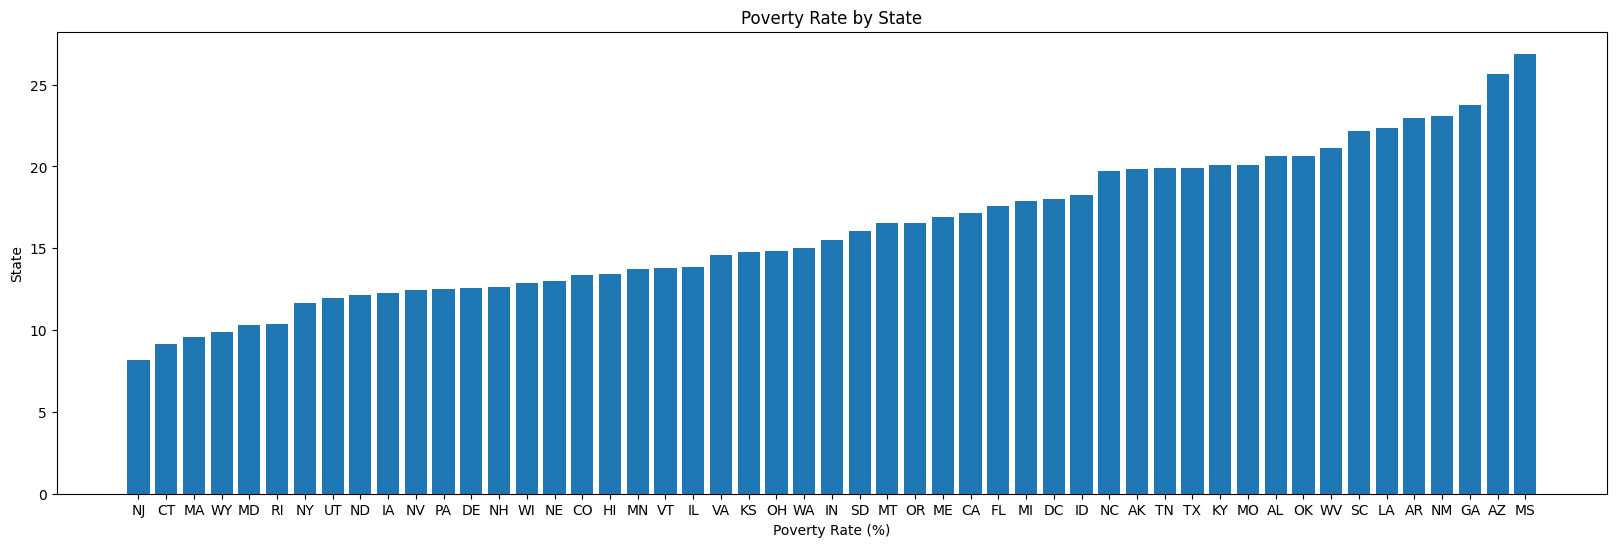

In [456]:
# Now we're ready to plot our data in the df_pct_poverty_state dataframe for the "poverty_rate" against "Geographic Area"

# set the size
plt.figure(figsize=(20, 6))
# Let's sort the data by the poverty_rate
df_pct_poverty_state = df_pct_poverty_state.sort_values(by="poverty_rate", ascending=True)
plt.bar(df_pct_poverty_state["Geographic Area"], df_pct_poverty_state["poverty_rate"])
plt.title("Poverty Rate by State")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("State")
plt.show()


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [457]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [458]:
df_pct_completed_hs.head()

# Convert the percent_completed_hs to a float, but we'll drop those rows that only have "-"
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs["percent_completed_hs"] != "-"]
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].astype(float)
# Group by "Geographic Area" and the average of "percent_completed_hs"
df_pct_completed_hs_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()
#df_pct_completed_hs.head()
df_pct_completed_hs_state.head()

,Geographic Area,percent_completed_hs
0,AK,84.63
1,AL,80.30
2,AR,79.95
3,AZ,80.47
4,CA,81.96


In [656]:
df_pct_completed_hs.dtypes

Geographic Area          object
City                     object
percent_completed_hs    float64
dtype: object

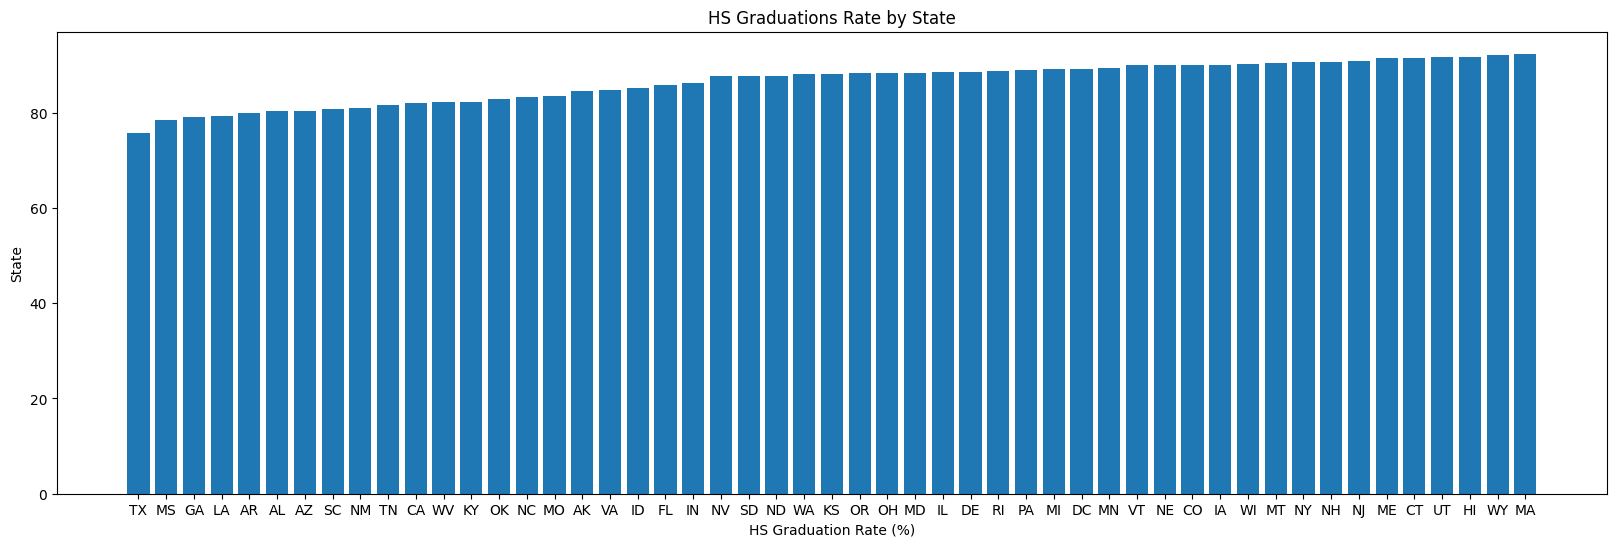

In [459]:
# set the size
plt.figure(figsize=(20, 6))
# Let's sort the data by the poverty_rate
df_pct_completed_hs_state = df_pct_completed_hs_state.sort_values(by="percent_completed_hs", ascending=True)
plt.bar(df_pct_completed_hs_state["Geographic Area"], df_pct_completed_hs_state["percent_completed_hs"])
plt.title("HS Graduations Rate by State")
plt.xlabel("HS Graduation Rate (%)")
plt.ylabel("State")
plt.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [460]:
df_pct_poverty_state.head()

,Geographic Area,poverty_rate
31,NJ,8.19
6,CT,9.14
19,MA,9.59
50,WY,9.89
20,MD,10.31


In [461]:
df_pct_completed_hs_state.head()

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95


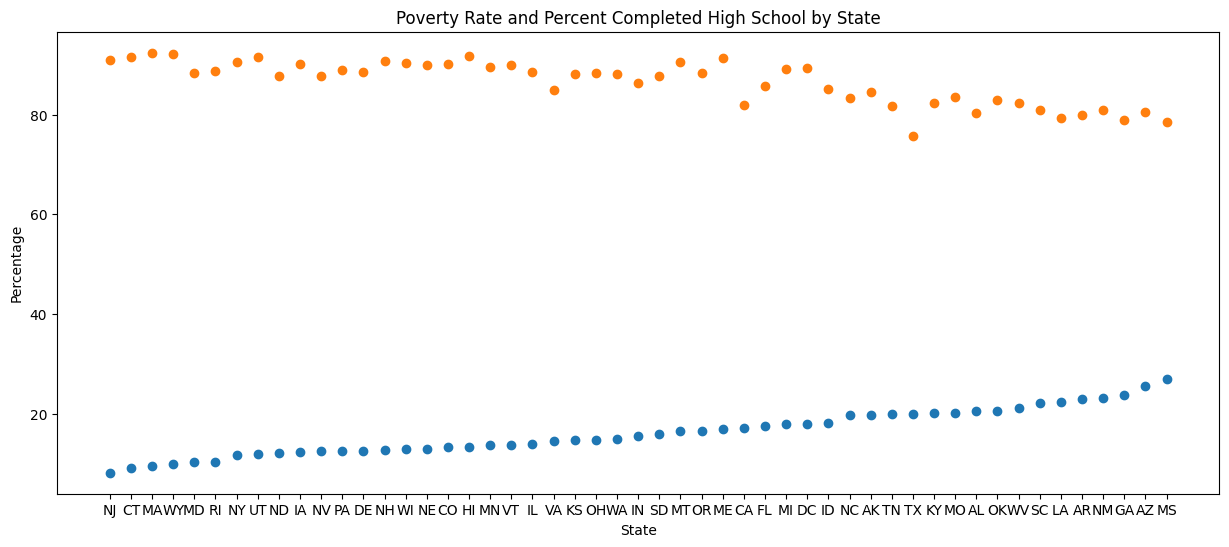

In [462]:
# let's plot both df_pct_poverty_state and df_pct_completed_hs_state on a chart.  They have the same "Geographic Area" and their "poverty_rate" and "precent_completed_hs" respectively
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 6))
plt.scatter(df_pct_poverty_state["Geographic Area"], df_pct_poverty_state["poverty_rate"], label="Poverty Rate")
plt.scatter(df_pct_completed_hs_state["Geographic Area"], df_pct_completed_hs_state["percent_completed_hs"], label="Percent Completed High School")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Poverty Rate and Percent Completed High School by State")
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [463]:
df_merged = pd.merge(df_pct_completed_hs_state, df_pct_poverty_state, on="Geographic Area")
df_merged.head()

,Geographic Area,percent_completed_hs,poverty_rate
0,TX,75.69,19.92
1,MS,78.47,26.88
2,GA,79.01,23.78
3,LA,79.29,22.34
4,AR,79.95,22.96


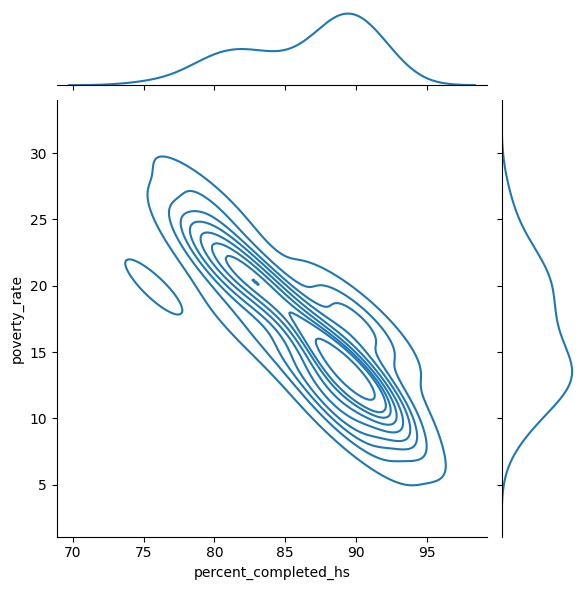

In [464]:
sns.jointplot(
    data=df_merged,
    x="percent_completed_hs",
    y="poverty_rate",
    kind="kde"
)

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

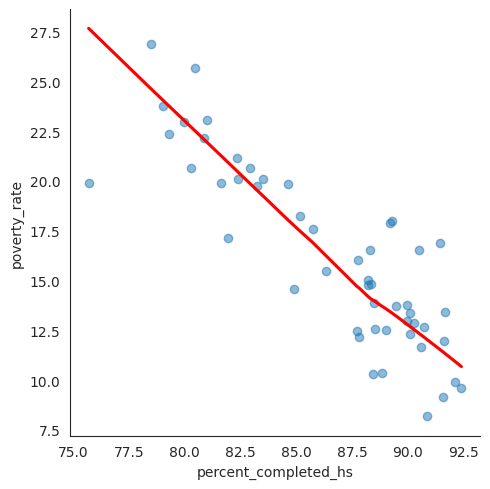

In [465]:
with sns.axes_style("white"):
    sns.lmplot(data=df_merged,
               x="percent_completed_hs",
               y="poverty_rate",
               lowess=True,
               line_kws={"color": "red"},
               scatter_kws={"alpha": 0.5}
               )
plt.show()    
    


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [466]:
df_share_race_city.head()

# Some rows have data that is only "(X)" and we should drop those rows when they match the columns named share_white, share_black, share_native_american, share_asian, share_hispanic
df_share_race_city_clean = df_share_race_city.drop(df_share_race_city[(df_share_race_city['share_white'] == '(X)') | 
                                                                (df_share_race_city['share_black'] == '(X)') | 
                                                                (df_share_race_city['share_native_american'] == '(X)') | 
                                                                (df_share_race_city['share_asian'] == '(X)') | 
                                                                (df_share_race_city['share_hispanic'] == '(X)')].index)

df_share_race_city_clean.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [467]:
df_share_race_city_clean.dtypes

Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

In [468]:
df_share_race_city_clean.share_white = df_share_race_city_clean.share_white.astype(float)
df_share_race_city_clean.share_black = df_share_race_city_clean.share_black.astype(float)
df_share_race_city_clean.share_hispanic = df_share_race_city_clean.share_hispanic.astype(float)
df_share_race_city_clean.share_asian = df_share_race_city_clean.share_asian.astype(float)
df_share_race_city_clean.share_native_american = df_share_race_city_clean.share_native_american.astype(float)
df_share_race_city_clean.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [469]:
# df_share_race_state = df_share_race_city_clean.groupby('Geographic area', as_index=True)[['share_black',
#                                                                            'share_native_american',
#                                                                            'share_asian',                                                                            
#                                                                            'share_hispanic',
#                                                                            'share_white']].mean()

df_share_race_state = df_share_race_city_clean.groupby('Geographic area', as_index=True).agg( {'share_white':'mean',
                                                                                               'share_black':'mean',
                                                                                               'share_native_american':'mean',
                                                                                               'share_asian':'mean',
                                                                                               'share_hispanic':'mean',
                                                                                               'Geographic area':'first'
                                                                                               })

df_share_race_state.head()
df_share_race_state.columns


Index(['share_white', 'share_black', 'share_native_american', 'share_asian',
       'share_hispanic', 'Geographic area'],
      dtype='object')

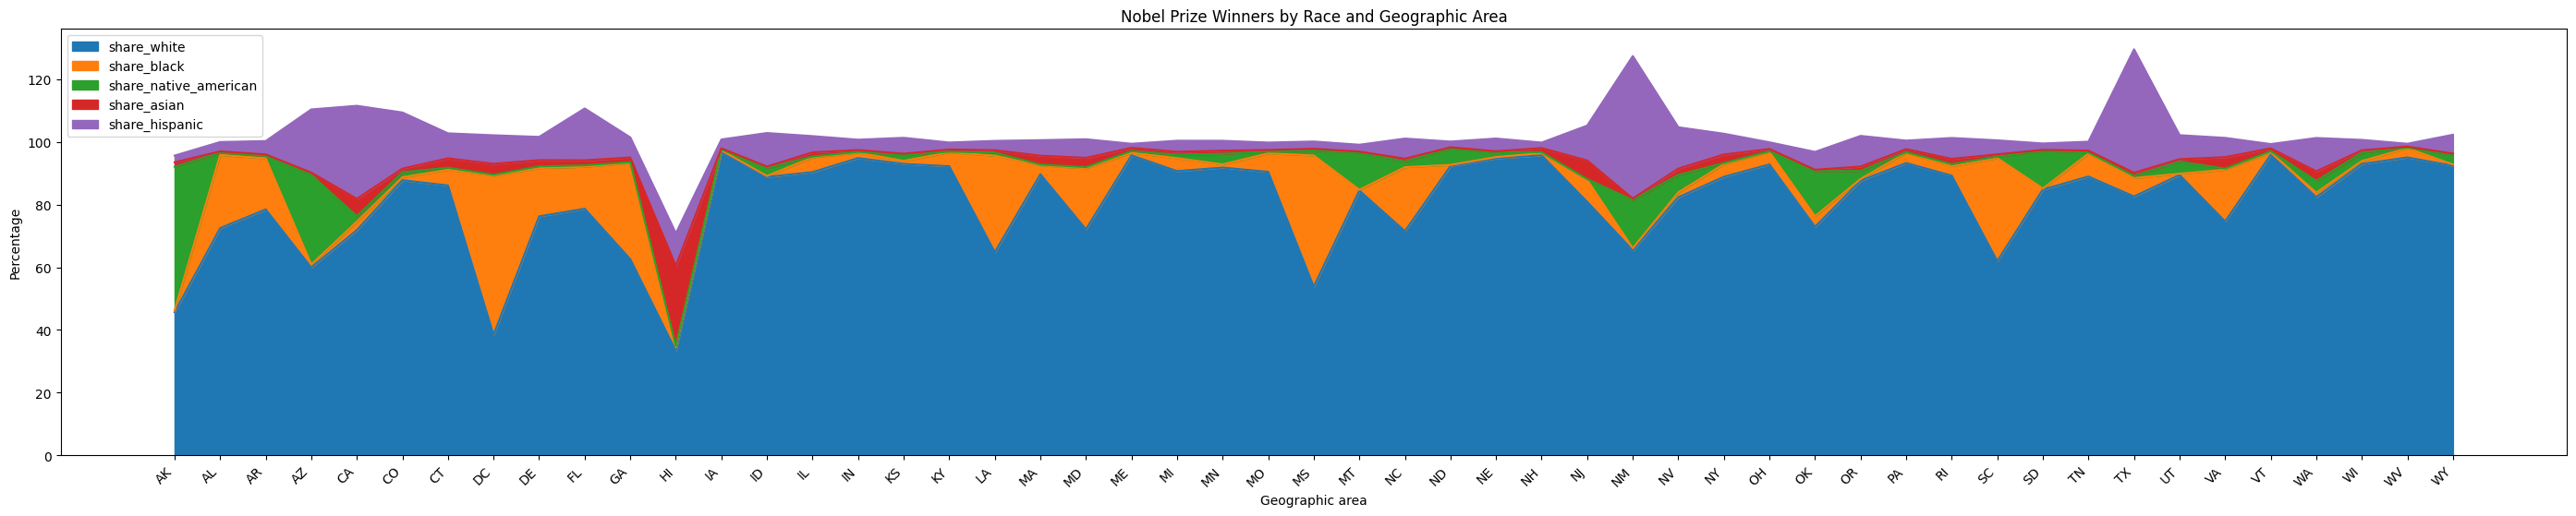

In [470]:
# now that I have df_share_race_state, I can display a bar chart for the data in "share_balck", "share_native_american", "share_asian", "share_hispanic", and "share_white" against the "Geographic area"
# The request is for a bar chart, but I think an area chart shows the details better ("area" versus "bar")
ax = df_share_race_state.plot(kind='area', 
                                   y=[
                                       'share_white',
                                       'share_black', 
                                       'share_native_american',
                                       'share_asian', 
                                       'share_hispanic', 
                                       ],
                                   figsize=(35, 6)
                                   )

ax.set_xlabel('Geographic area')
ax.set_xticks(range(len(df_share_race_state)))
ax.set_xticklabels(df_share_race_state['Geographic area'], rotation=45, ha='right')
ax.set_ylabel('Percentage')
ax.set_title('Share by Race and Geographic Area')
plt.show()


In [471]:
df_share_race_state.shape

(51, 6)

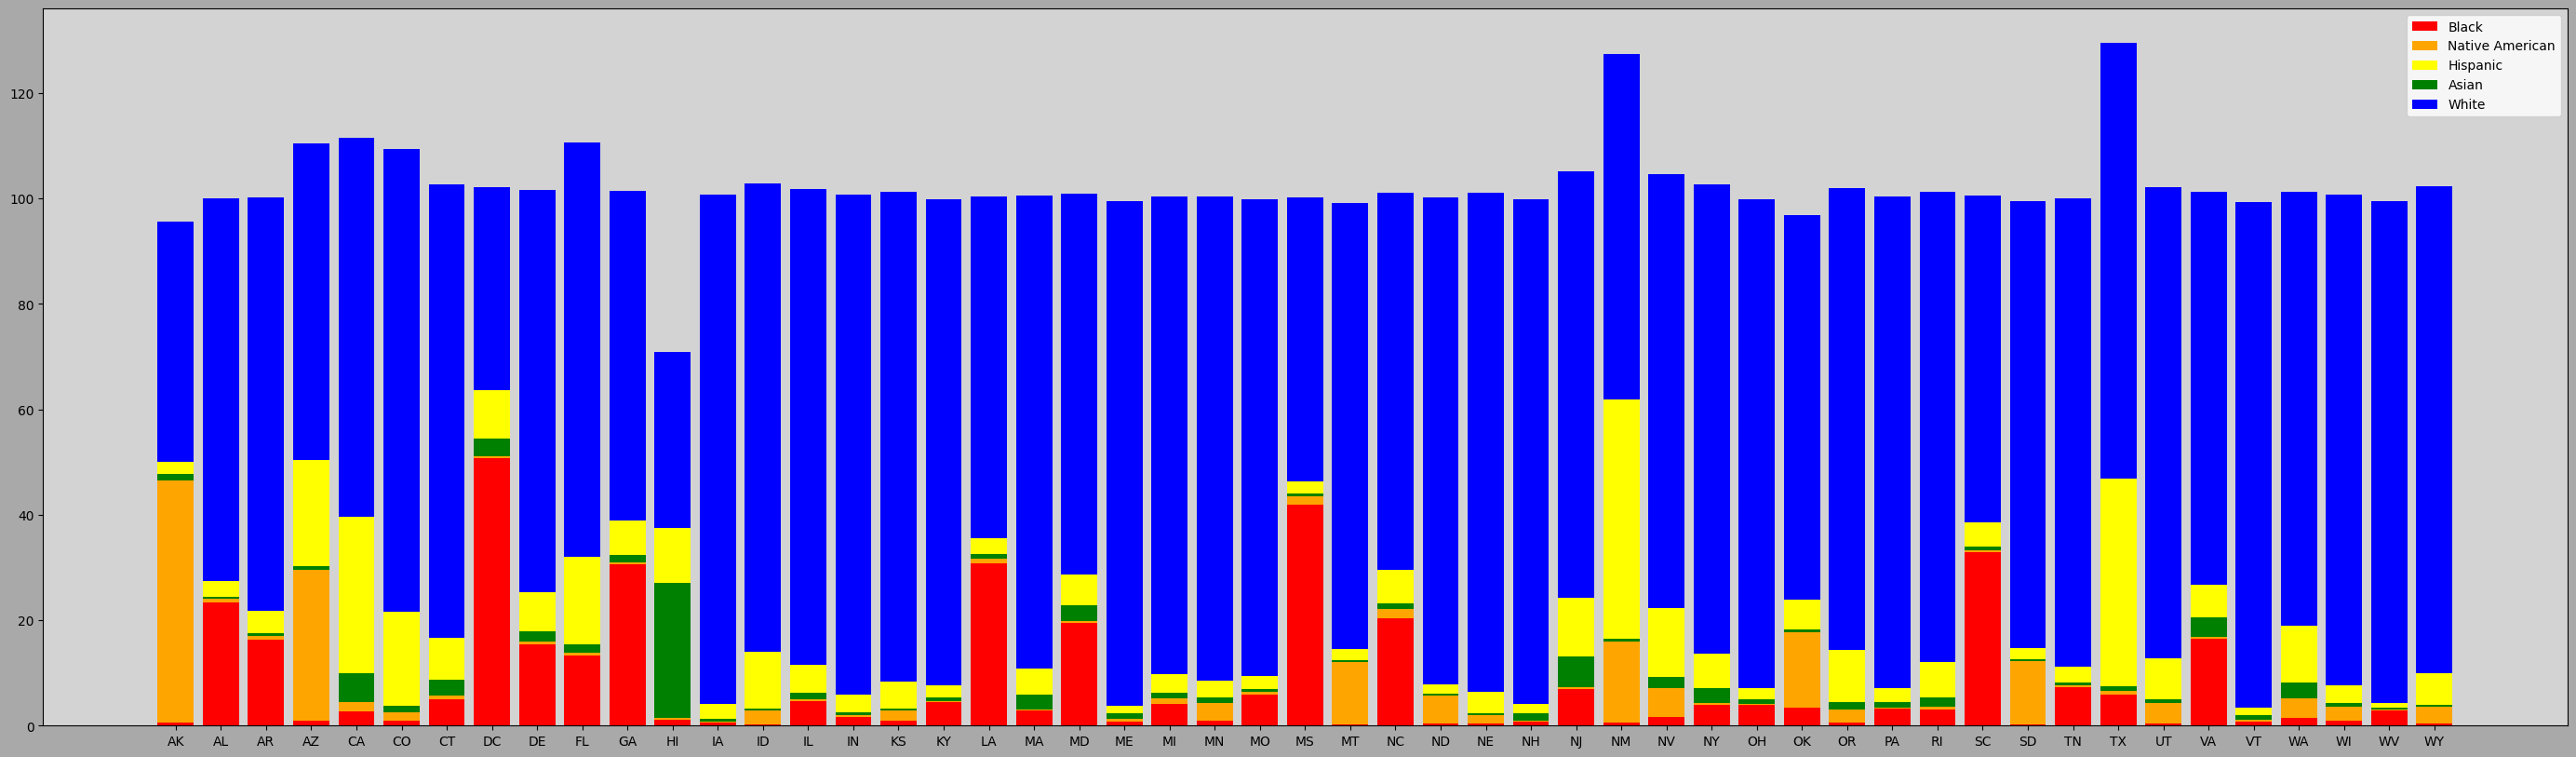

In [472]:
# now that I have df_share_race_state, I can display a bar chart for the data in "share_balck", "share_native_american", "share_asian", "share_hispanic", and "share_white" against the "Geographic area"
# The request is for a bar chart, but I think an area chart shows the details better ("area" versus "bar")
plt.figure(figsize=(35, 10),
           facecolor='darkgray',
           )
ax = plt.axes()
ax.set_facecolor('lightgray')
# I'll use ROYGIV colors here to avoid any unintended color+race associations.
plt.bar(data=df_share_race_state, x='Geographic area', height=df_share_race_state['share_black'], label='Black', color='red')
plt.bar(data=df_share_race_state, x='Geographic area', height=df_share_race_state['share_native_american'], bottom=df_share_race_state['share_black'], label='Native American', color='orange')
plt.bar(data=df_share_race_state, x='Geographic area', height=df_share_race_state['share_hispanic'], bottom=df_share_race_state['share_black']+df_share_race_state['share_native_american']+df_share_race_state['share_asian'], label='Hispanic', color='yellow')
plt.bar(data=df_share_race_state, x='Geographic area', height=df_share_race_state['share_asian'], bottom=df_share_race_state['share_black']+df_share_race_state['share_native_american'], label='Asian', color='green')
plt.bar(data=df_share_race_state, x='Geographic area', height=df_share_race_state['share_white'], bottom=df_share_race_state['share_black']+df_share_race_state['share_native_american']+df_share_race_state['share_hispanic']+df_share_race_state['share_asian'], label='White', color='blue')
plt.legend()
plt.show()


In [473]:
# I noticed the data for some states is not 100%.  Let's look at FL, HI, NM, and TX
print(f"FL :\n\t{df_share_race_state[df_share_race_state['Geographic area'].isin(['FL','HI','NM','TX'])]}")


FL :
	                 share_white  share_black  share_native_american  share_asian  \
Geographic area                                                                 
FL                     78.67        13.37                   0.46         1.62   
HI                     33.37         1.07                   0.39        25.65   
NM                     65.42         0.67                  15.34         0.49   
TX                     82.59         5.88                   0.66         1.01   

                 share_hispanic Geographic area  
Geographic area                                  
FL                        16.53              FL  
HI                        10.36              HI  
NM                        45.43              NM  
TX                        39.36              TX  


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [474]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [475]:
df_fatalities_by_race = df_fatalities.groupby('race').count().reset_index()
df_fatalities_by_race.race = df_fatalities_by_race.race.replace(['A'],'Asian')
df_fatalities_by_race.race = df_fatalities_by_race.race.replace(['B'],'Black')
df_fatalities_by_race.race = df_fatalities_by_race.race.replace(['W'],'White')
df_fatalities_by_race.race = df_fatalities_by_race.race.replace(['H'],'Hispanic')
df_fatalities_by_race.race = df_fatalities_by_race.race.replace(['N'],'Native American')
df_fatalities_by_race.race = df_fatalities_by_race.race.replace(['O'],'Other')


df_fatalities_by_race.head()


,race,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Asian,39,39,39,39,39,39,39,39,39,39,39,39,39
1,Black,618,618,618,618,618,618,618,618,618,618,618,618,618
2,Hispanic,423,423,423,423,423,423,423,423,423,423,423,423,423
3,Native American,31,31,31,31,31,31,31,31,31,31,31,31,31
4,Other,28,28,28,28,28,28,28,28,28,28,28,28,28


In [476]:
fig = px.pie(labels=df_fatalities_by_race.race,
             values=df_fatalities_by_race.id,
             names=df_fatalities_by_race.race,
             title="Deaths by race",
             hole=0.5,
)
fig.update_traces(textposition='outside',
                  textinfo='percent+label'    
)

fig.show()
             
             

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [477]:
df_fatalities_by_gender = df_fatalities.groupby(by='gender').count().reset_index()
df_fatalities_by_gender.head()

,gender,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,F,107,107,107,107,107,107,107,107,107,107,107,107,107
1,M,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428


In [478]:
fig = px.pie(labels=df_fatalities_by_gender.gender,
             values=df_fatalities_by_gender.id,
             names=df_fatalities_by_gender.gender,
             title="Deaths by gender",
             hole=0.5,
)
fig.update_traces(textposition='outside',
                  textinfo='percent+label'    
)

fig.show()
             

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [479]:
df_fatalities_by_gender_and_manner = df_fatalities.groupby(by=["gender", "manner_of_death"]).count().reset_index()
df_fatalities_by_gender_and_manner.head(5)

,gender,manner_of_death,id,name,date,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,F,shot,102,102,102,102,102,102,102,102,102,102,102,102
1,F,shot and Tasered,5,5,5,5,5,5,5,5,5,5,5,5
2,M,shot,2261,2261,2261,2261,2261,2261,2261,2261,2261,2261,2261,2261
3,M,shot and Tasered,167,167,167,167,167,167,167,167,167,167,167,167


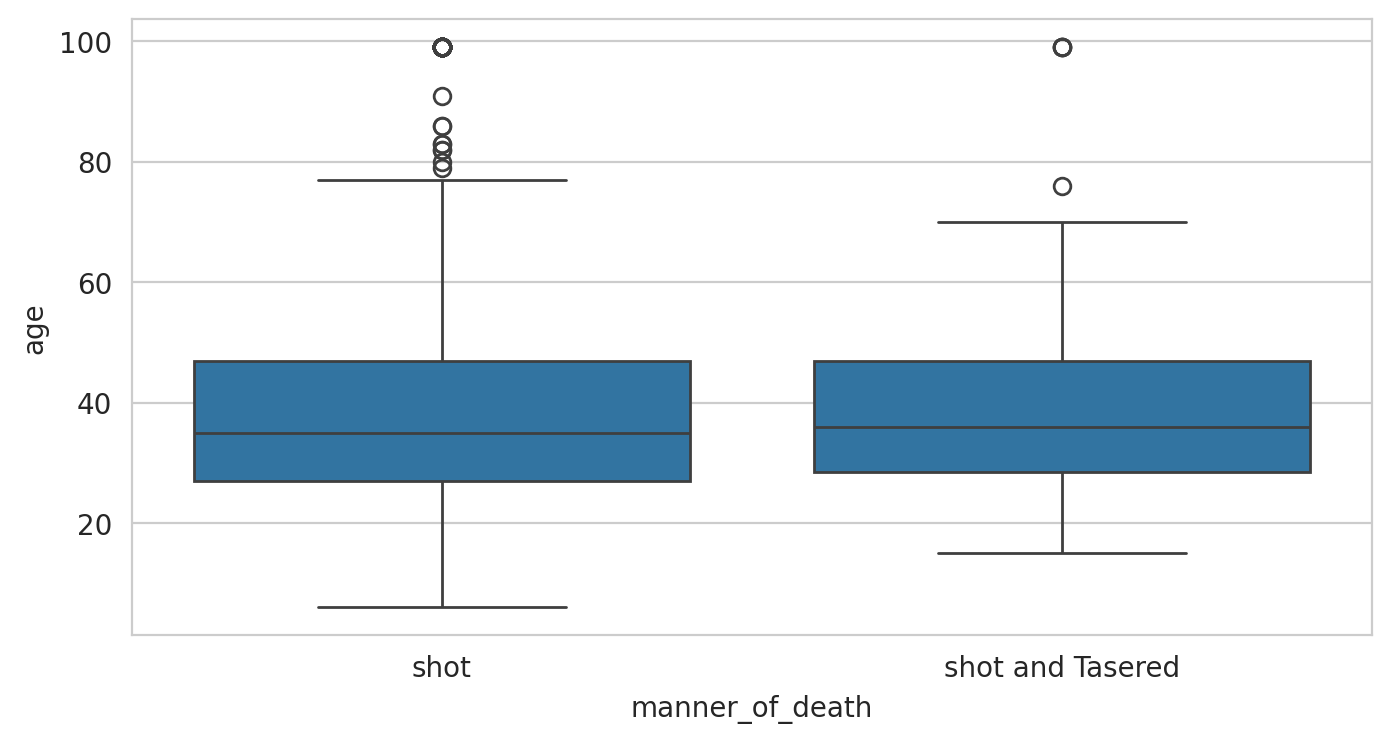

In [480]:
# Create a box chart showing the differences in "gender" for "manner_of_death" in df_fatalities
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_fatalities[df_fatalities['gender']=='M'],
                x='manner_of_death',
                y='age',
                legend='auto',
                )
plt.show()

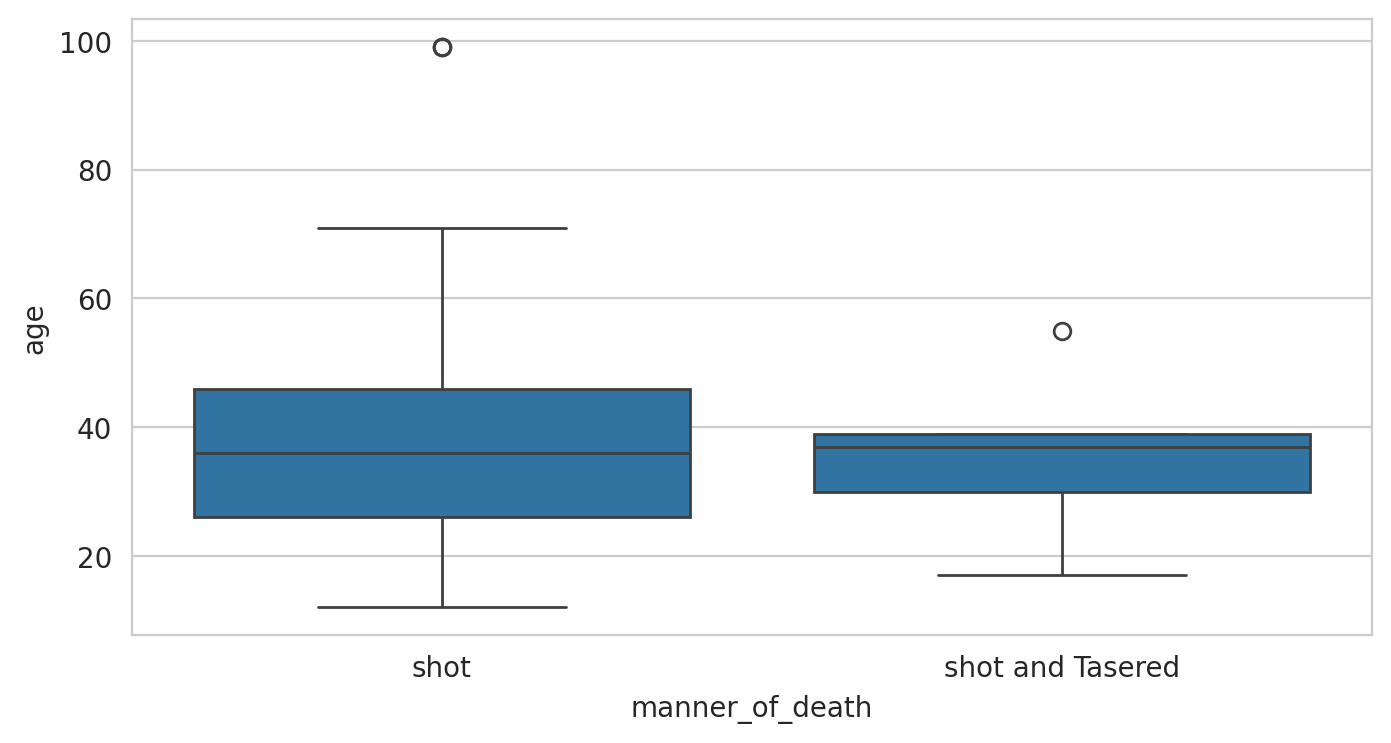

In [481]:
# Create a box chart showing the differences in "gender" for "manner_of_death" in df_fatalities
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_fatalities[df_fatalities['gender']=='F'],
                x='manner_of_death',
                y='age',
                legend='auto',
                )
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [482]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [483]:
df_fatalities.armed.value_counts(ascending=False)

armed
gun                        1398
knife                       373
vehicle                     177
unarmed                     171
undetermined                117
                           ... 
air conditioner               1
pole and knife                1
baseball bat and bottle       1
fireworks                     1
pen                           1
Name: count, Length: 69, dtype: int64

In [484]:
print(f"The number of people armed = {df_fatalities.armed.isin(['gun','knife','vehicle']).sum()}, and the percentage is {df_fatalities.armed.isin(['gun', 'knife', 'vehicle']).sum() / df_fatalities.shape[0] * 100:.2f}%")
print(f"The number of people unarmed = {df_fatalities.armed.isin(['unarmed', 'toy weapon']).sum()}, and the percentage is {df_fatalities.armed.isin(['unarmed', 'toy weapon']).sum() / df_fatalities.shape[0] * 100:.2f}%")


The number of people armed = 1948, and the percentage is 76.84%
The number of people unarmed = 275, and the percentage is 10.85%


In [485]:
# create a new dataframe by group the df_fatalities dataframe by the 'armed' column and specify the number of instances each has
df_fatalities_by_armed = df_fatalities.groupby('armed').size().reset_index(name='count')

# Sort the dataframe
df_fatalities_by_armed = df_fatalities_by_armed.sort_values(by='count', ascending=False)

# Now, let's limit to the top 10, the other values are quit small
df_fatalities_by_armed = df_fatalities_by_armed.head(10)
df_fatalities_by_armed.head()

,armed,count
25,gun,1398
32,knife,373
68,vehicle,177
64,unarmed,171
65,undetermined,117


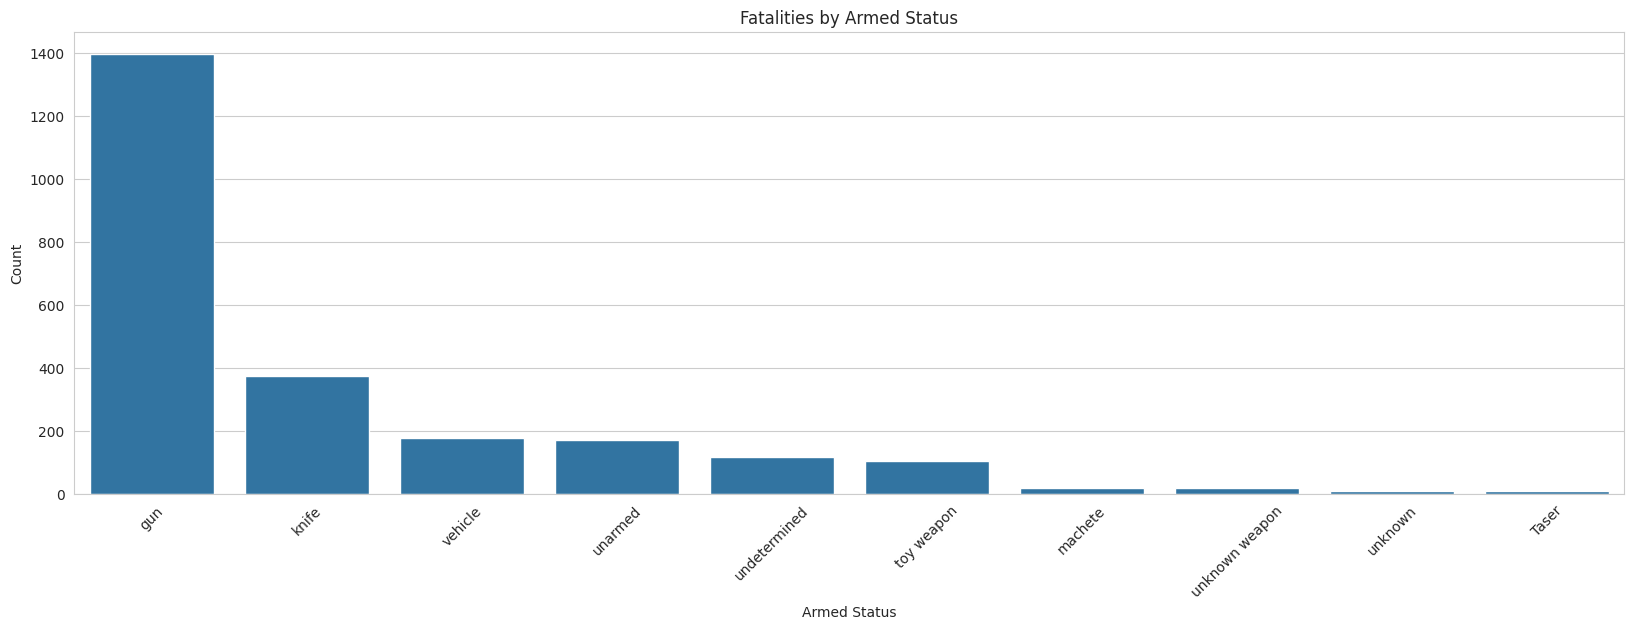

In [486]:
import seaborn as sns
plt.figure(figsize=(20, 6))
# Display the values in df_fatalities_by_armed where x = "armed" and y is "count"
with sns.axes_style("whitegrid"):
    sns.barplot(x="armed", y="count", data=df_fatalities_by_armed)
    plt.title("Fatalities by Armed Status")
    plt.xlabel("Armed Status")
    plt.ylabel("Count")
    # Rotate the x axis labels
    plt.xticks(rotation=45)
    plt.show()
    



# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [487]:
# Find the number of people under 25 in df_fatalities.  This is the 'age' column.
number_of_people_under_25 = df_fatalities['age'].lt(25).sum()
number_of_people_over_25 = df_fatalities['age'].gt(25).sum()
print(f'There are {number_of_people_under_25} people under 25 in the dataset.')
print(f'There are {number_of_people_over_25} people over 25 in the dataset.')

There are 450 people under 25 in the dataset.
There are 1982 people over 25 in the dataset.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

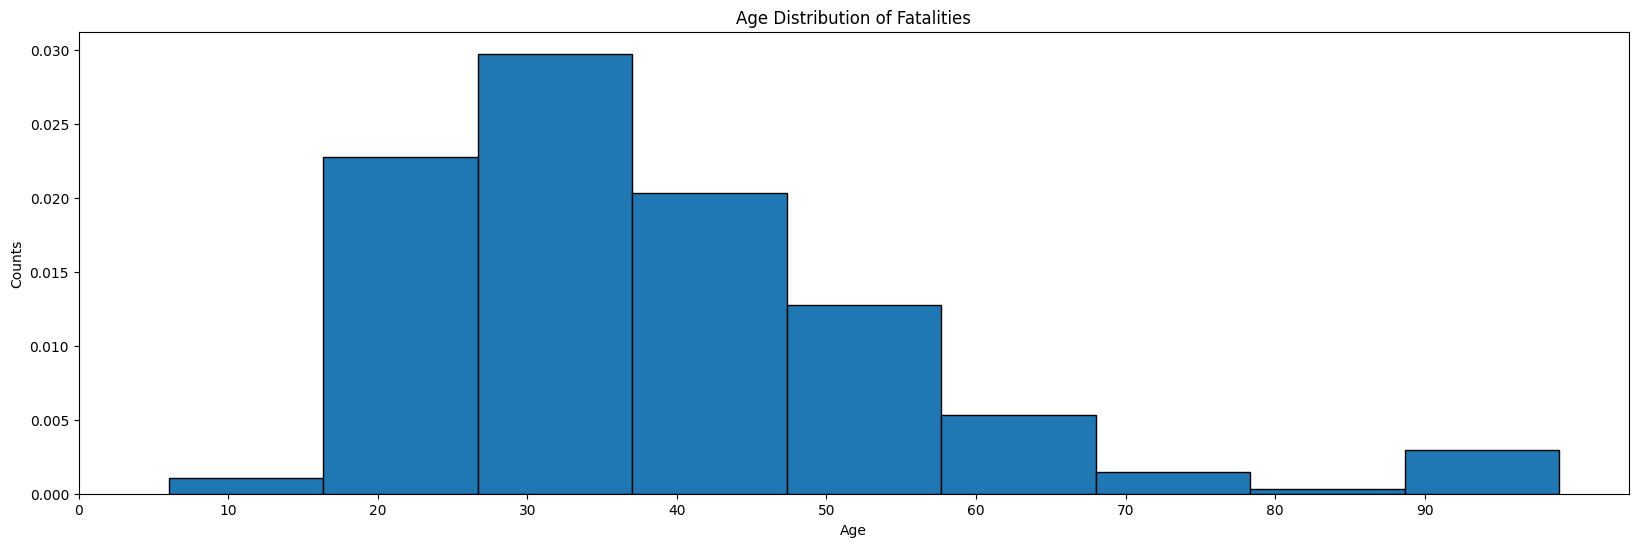

In [488]:
plt.figure(figsize=(20, 6))

plt.hist(df_fatalities.age,
         bins=9,
         edgecolor='black',
         density=True
         )
plt.title('Age Distribution of Fatalities')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(False)
plt.xticks(range(0, 100, 10))
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions? 

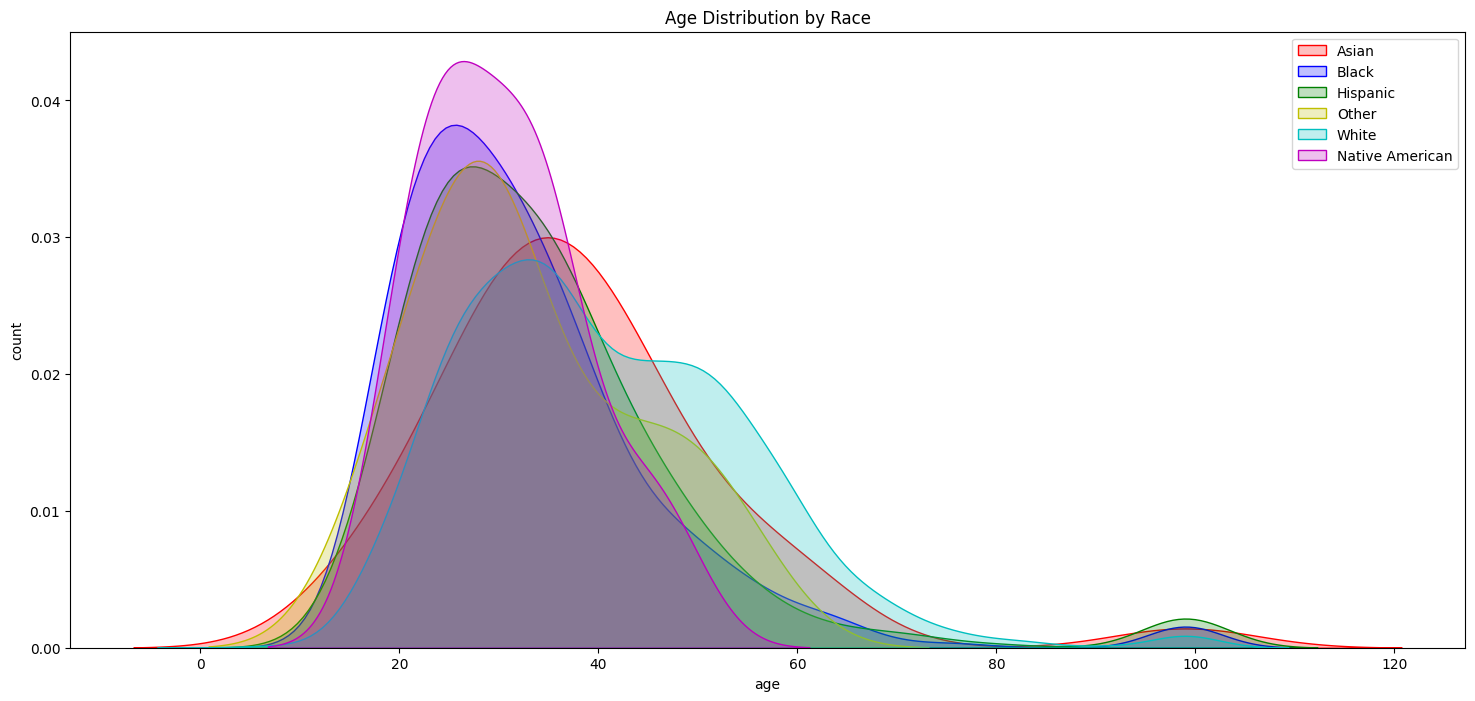

In [489]:
plt.figure(figsize=(18, 8))
sns.kdeplot(df_fatalities.loc[(df_fatalities.race =='A'), 'age'], color='r', fill=True, label='Asian')
sns.kdeplot(df_fatalities.loc[(df_fatalities.race =='B'), 'age'], color='b', fill=True, label='Black')
sns.kdeplot(df_fatalities.loc[(df_fatalities.race =='H'), 'age'], color='g', fill=True, label='Hispanic')
sns.kdeplot(df_fatalities.loc[(df_fatalities.race =='O'), 'age'], color='y', fill=True, label='Other')
sns.kdeplot(df_fatalities.loc[(df_fatalities.race =='W'), 'age'], color='c', fill=True, label='White')
sns.kdeplot(df_fatalities.loc[(df_fatalities.race =='N'), 'age'], color='m', fill=True, label='Native American')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Distribution by Race')
plt.legend()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [532]:
df_fatalities_by_race.head(10)

,race,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Asian,39,39,39,39,39,39,39,39,39,39,39,39,39
1,Black,618,618,618,618,618,618,618,618,618,618,618,618,618
2,Hispanic,423,423,423,423,423,423,423,423,423,423,423,423,423
3,Native American,31,31,31,31,31,31,31,31,31,31,31,31,31
4,Other,28,28,28,28,28,28,28,28,28,28,28,28,28
5,U,195,195,195,195,195,195,195,195,195,195,195,195,195
6,White,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201


In [491]:
# I'll use a pie chart here.
fig = px.pie(labels=df_fatalities_by_race.race,
             values=df_fatalities_by_race.id,
             names=df_fatalities_by_race.race,
             title="Deaths by race",
             hole=0.5,
)
fig.update_traces(textposition='outside',
                  textinfo='value+label'    
)

fig.show()
             
             

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [492]:
#df_fatalities.head()
df_fatalities['signs_of_mental_illness'].value_counts()

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

In [493]:
# df_fatalities_mi = df_fatalities[df_fatalities['signs_of_mental_illness']]
# df_fatalities_mi.head()

# Calculate the counts of those with mental illness and those without
# counts_mi = df_fatalities.signs_of_mental_illness.value_counts()
# counts_no_mi = ~df_fatalities.signs_of_mental_illness.value_counts()

counts_mi = df_fatalities.signs_of_mental_illness.value_counts()[True]
counts_no_mi = df_fatalities.signs_of_mental_illness.value_counts()[False]

print(f"Number of cases with mental illness: {counts_mi}")
print(f"Number of cases without mental illness: {counts_no_mi}")


Number of cases with mental illness: 633
Number of cases without mental illness: 1902


In [494]:
print(f"The percentage of people killed with a mental illness is {counts_mi / (counts_mi + counts_no_mi) * 100:.2f}")

The percentage of people killed with a mental illness is 24.97


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [495]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [496]:
# Print the top-10 cities with the most police killings.  This means looking at df_fatalities, grouping by city + state, and the sorting in decsending order to find the top 10
df_fatalities[['city', 'state']].value_counts().head(10)
# df_fatalities_top_10 = df_fatalities[['city','state']].value_counts().head(10)
df_fatalities_top_10 = df_fatalities.groupby(['city', 'state']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_fatalities_top_10.head(10)


,city,state,count
805,Los Angeles,CA,39
1083,Phoenix,AZ,31
632,Houston,TX,26
262,Chicago,IL,25
758,Las Vegas,NV,21
1215,San Antonio,TX,20
886,Miami,FL,17
310,Columbus,OH,17
70,Austin,TX,16
1324,St. Louis,MO,15


In [497]:
df_fatalities_top_10.dtypes
df_fatalities_top_10.head(10)

,city,state,count
805,Los Angeles,CA,39
1083,Phoenix,AZ,31
632,Houston,TX,26
262,Chicago,IL,25
758,Las Vegas,NV,21
1215,San Antonio,TX,20
886,Miami,FL,17
310,Columbus,OH,17
70,Austin,TX,16
1324,St. Louis,MO,15


<Figure size 3500x600 with 0 Axes>

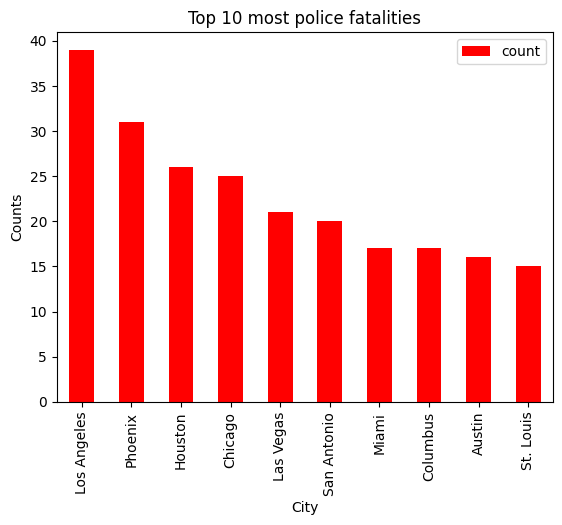

In [498]:
# Now let's create a chart with the top 10 cities with the most police killings
plt.figure(figsize=(35, 6)) 

# Let's use a bar chart to show the sizes
df_fatalities_top_10.head(10).plot(kind="bar",
                                   x='city',
                                   y='count',
                                   color='red',
                                   
                                   )
plt.title("Top 10 most police fatalities")
plt.xlabel("City")
plt.ylabel("Counts")
plt.show()
        


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [519]:
# Get a list of the top-10 police fatality cities.
df_fatalities_top_10.head(10)


,city,state,count
805,Los Angeles,CA,39
1083,Phoenix,AZ,31
632,Houston,TX,26
262,Chicago,IL,25
758,Las Vegas,NV,21
1215,San Antonio,TX,20
886,Miami,FL,17
310,Columbus,OH,17
70,Austin,TX,16
1324,St. Louis,MO,15


In [536]:
# Calclate the percentage of races for each city as a mean.
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [553]:
df_share_race_city_clean.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [574]:
df_share_race_city_clean[(df_share_race_city_clean['City'].str.contains('Los Angeles')) & (df_share_race_city_clean['Geographic area'] == "CA")].share_white

2320   50.50
2474   87.70
2627   55.70
2714   49.80
Name: share_white, dtype: float64

In [575]:
df_share_race_city_clean[(df_share_race_city_clean['City'].str.contains('Los Angeles')) & (df_share_race_city_clean['Geographic area'] == "CA")].share_white.mean()



np.float64(60.925)

In [586]:
# Let's iterate over the first 10 of the df_fatalities_top_10, and use both 'city' and 'state' to get rows from df_fatalities
# I use "contains" to match the string for the city, since there are variations in how the city is named (East Lost Angeles, etc.)
for i, row in df_fatalities_top_10.head(10).iterrows():
    city = row['city']
    state = row['state']
    # Next, get counts of all the different details we want.
    num_a = df_fatalities[(df_fatalities['city'] == city) & (df_fatalities['state'] == state) & (df_fatalities['race'] == 'A')].shape[0]
    num_b = df_fatalities[(df_fatalities['city'] == city) & (df_fatalities['state'] == state) & (df_fatalities['race'] == 'B')].shape[0]
    num_h = df_fatalities[(df_fatalities['city'] == city) & (df_fatalities['state'] == state) & (df_fatalities['race'] == 'H')].shape[0]
    num_n = df_fatalities[(df_fatalities['city'] == city) & (df_fatalities['state'] == state) & (df_fatalities['race'] == 'N')].shape[0]
    num_o = df_fatalities[(df_fatalities['city'] == city) & (df_fatalities['state'] == state) & (df_fatalities['race'] == 'O')].shape[0]
    num_w = df_fatalities[(df_fatalities['city'] == city) & (df_fatalities['state'] == state) & (df_fatalities['race'] == 'W')].shape[0]
    num_u = df_fatalities[(df_fatalities['city'] == city) & (df_fatalities['state'] == state) & (df_fatalities['race'] == 'U')].shape[0]
    print(f"In {city}, {state}, there were {num_a + num_b + num_h + num_n + num_o + num_w + num_u} total fatalities, including {num_a} Asian, {num_b} Black, {num_h} Hispanic, {num_n} Native American, {num_w} White, {num_o} Other and {num_u} Unknown fatalities.")
    df_fatalities_top_10.loc[i, 'total_fatalities'] = num_a + num_b + num_h + num_n + num_o + num_w + num_u
    df_fatalities_top_10.loc[i, 'Asian'] = num_a
    df_fatalities_top_10.loc[i, 'Black'] = num_b
    df_fatalities_top_10.loc[i, 'Hispanic'] = num_h
    df_fatalities_top_10.loc[i, 'Native American'] = num_n
    df_fatalities_top_10.loc[i, 'White'] = num_w
    df_fatalities_top_10.loc[i, 'Other'] = num_o
    df_fatalities_top_10.loc[i, 'Unknown'] = num_u
    
    pct_w = df_share_race_city_clean[(df_share_race_city_clean['City'].str.contains(city)) & (df_share_race_city_clean['Geographic area'] ==state)].share_white.mean()
    pct_b = df_share_race_city_clean[(df_share_race_city_clean['City'].str.contains(city)) & (df_share_race_city_clean['Geographic area'] ==state)].share_black.mean()
    pct_h = df_share_race_city_clean[(df_share_race_city_clean['City'].str.contains(city)) & (df_share_race_city_clean['Geographic area'] ==state)].share_hispanic.mean()
    pct_a = df_share_race_city_clean[(df_share_race_city_clean['City'].str.contains(city)) & (df_share_race_city_clean['Geographic area'] ==state)].share_asian.mean()
    pct_n = df_share_race_city_clean[(df_share_race_city_clean['City'].str.contains(city)) & (df_share_race_city_clean['Geographic area'] ==state)].share_native_american.mean()
    
    print(f"In {city}, {state}, the shares are White: {pct_w}, Black: {pct_b}, Hispanic: {pct_h}, Asian: {pct_a}, Native American: {pct_n}")

    df_fatalities_top_10.loc[i, 'pct_white'] = pct_w
    df_fatalities_top_10.loc[i, 'pct_black'] = pct_b
    df_fatalities_top_10.loc[i, 'pct_hispanic'] = pct_h
    df_fatalities_top_10.loc[i, 'pct_asian'] = pct_a
    df_fatalities_top_10.loc[i, 'pct_native_american'] = pct_n
    


In Los Angeles, CA, there were 39 total fatalities, including 1 Asian, 10 Black, 19 Hispanic, 0 Native American, 6 White, 0 Other and 3 Unknown fatalities.
In Los Angeles, CA, the shares are White: 60.925, Black: 5.575, Hispanic: 52.8, Asian: 3.575, Native American: 1.0999999999999999
In Phoenix, AZ, there were 31 total fatalities, including 0 Asian, 2 Black, 11 Hispanic, 3 Native American, 12 White, 0 Other and 3 Unknown fatalities.
In Phoenix, AZ, the shares are White: 65.9, Black: 6.5, Hispanic: 40.8, Asian: 3.2, Native American: 2.2
In Houston, TX, there were 26 total fatalities, including 1 Asian, 15 Black, 6 Hispanic, 0 Native American, 3 White, 0 Other and 1 Unknown fatalities.
In Houston, TX, the shares are White: 58.2, Black: 12.6, Hispanic: 65.94999999999999, Asian: 3.3, Native American: 0.8
In Chicago, IL, there were 25 total fatalities, including 0 Asian, 21 Black, 1 Hispanic, 0 Native American, 2 White, 0 Other and 1 Unknown fatalities.
In Chicago, IL, the shares are White

In [587]:
df_fatalities_top_10.head(15)

,city,state,count,total_fatalities,Asian,Black,Hispanic,Native American,White,Other,Unknown,pct_white,pct_black,pct_hispanic,pct_asian,pct_native,pct_native_american
805,Los Angeles,CA,39,39.00,1.00,10.00,19.00,0.00,6.00,0.00,3.00,60.92,5.58,52.80,3.58,1.10,1.10
1083,Phoenix,AZ,31,31.00,0.00,2.00,11.00,3.00,12.00,0.00,3.00,65.90,6.50,40.80,3.20,2.20,2.20
632,Houston,TX,26,26.00,1.00,15.00,6.00,0.00,3.00,0.00,1.00,58.20,12.60,65.95,3.30,0.80,0.80
262,Chicago,IL,25,25.00,0.00,21.00,1.00,0.00,2.00,0.00,1.00,57.48,21.77,31.38,3.08,0.55,0.55
758,Las Vegas,NV,21,21.00,0.00,3.00,5.00,0.00,9.00,0.00,4.00,54.75,15.50,35.15,6.20,0.75,0.75
1215,San Antonio,TX,20,20.00,0.00,3.00,12.00,0.00,3.00,0.00,2.00,72.60,6.90,63.20,2.40,0.90,0.90
886,Miami,FL,17,17.00,0.00,8.00,6.00,0.00,2.00,0.00,1.00,68.05,24.68,53.90,1.77,0.25,0.25
310,Columbus,OH,17,17.00,0.00,10.00,0.00,0.00,5.00,1.00,1.00,77.85,14.40,5.20,2.15,0.45,0.45
70,Austin,TX,16,16.00,0.00,3.00,2.00,0.00,11.00,0.00,0.00,68.30,8.10,35.10,6.30,0.90,0.90
1324,St. Louis,MO,15,15.00,0.00,11.00,0.00,0.00,3.00,0.00,1.00,68.05,26.50,2.80,2.50,0.30,0.30


/tmp/ipykernel_4087/3305359009.py:21: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



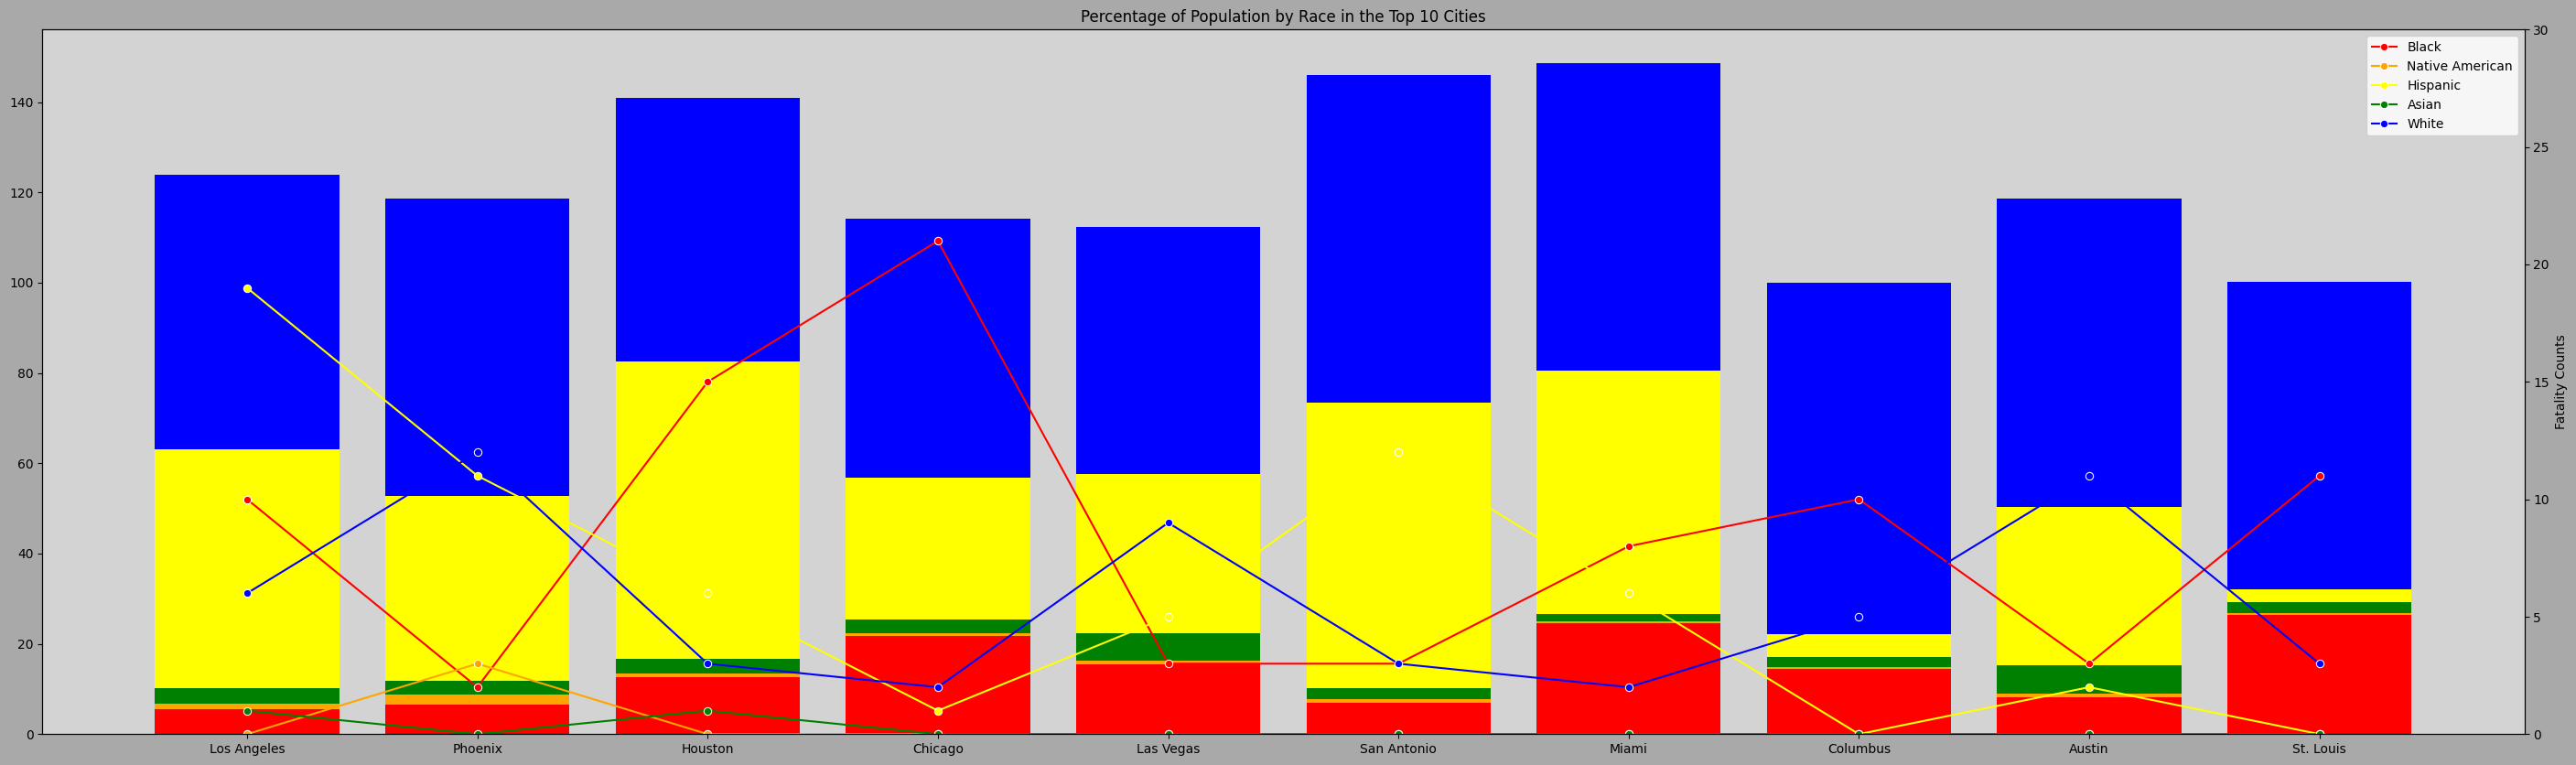

In [622]:
# now that I have df_share_race_state, I can display a bar chart for the data in "share_balck", "share_native_american", "share_asian", "share_hispanic", and "share_white" against the "Geographic area"
# The request is for a bar chart, but I think an area chart shows the details better ("area" versus "bar")
# Start by re-sizing the df_fatalities_top_10 to only the first 10
df_fatalities_top_10 = df_fatalities_top_10.head(10)
plt.figure(figsize=(35, 10),
           facecolor='darkgray',
           )
ax = plt.axes()
ax.set_facecolor('lightgray')
# I'll use ROYGIV colors here to avoid any unintended color+race associations.
plt.bar(data=df_fatalities_top_10, x='city', height=df_fatalities_top_10.pct_black, label='Black', color='red')
plt.bar(data=df_fatalities_top_10, x='city', height=df_fatalities_top_10.pct_native_american, bottom=df_fatalities_top_10.pct_black, label='Native American', color='orange')
plt.bar(data=df_fatalities_top_10, x='city', height=df_fatalities_top_10.pct_hispanic, bottom=df_fatalities_top_10.pct_black+df_fatalities_top_10.pct_native_american+df_fatalities_top_10.pct_asian, label='Hispanic', color='yellow')
plt.bar(data=df_fatalities_top_10, x='city', height=df_fatalities_top_10.pct_asian, bottom=df_fatalities_top_10.pct_black+df_fatalities_top_10.pct_native_american, label='Asian', color='green')
plt.bar(data=df_fatalities_top_10, x='city', height=df_fatalities_top_10.pct_white, bottom=df_fatalities_top_10.pct_black+df_fatalities_top_10.pct_native_american+df_fatalities_top_10.pct_hispanic+df_fatalities_top_10.pct_asian, label='White', color='blue')
# Setup a secondary y-axis
ax2 = ax.twinx()
ax2.set_ylim(0, 30)
ax2.set_ylabel('Fatality Counts')
# Add a legend
plt.legend(loc='upper left')
plt.xlabel('City')

# Now, create sns.lineplots  using this secondary axis

sns.lineplot(data=df_fatalities_top_10, x='city', y='Black', marker='o', label='Black', color='red')
sns.lineplot(data=df_fatalities_top_10, x='city', y='Native American', marker='o', label='Native American', color='orange')
sns.lineplot(data=df_fatalities_top_10, x='city', y='Hispanic', marker='o', label='Hispanic', color='yellow')
sns.lineplot(data=df_fatalities_top_10, x='city', y='Asian', marker='o', label='Asian', color='green')
sns.lineplot(data=df_fatalities_top_10, x='city', y='White', marker='o', label='White', color='blue')

plt.title('Percentage of Population by Race in the Top 10 Cities')
plt.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [624]:
#df_fatalities.head()
df_fatalities_by_state = df_fatalities.groupby(by=['state'], as_index=True).count().reset_index()
df_fatalities_by_state.head()

,state,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
0,AK,15,15,15,15,15,15,15,15,15,15,15,15,15
1,AL,50,50,50,50,50,50,50,50,50,50,50,50,50
2,AR,26,26,26,26,26,26,26,26,26,26,26,26,26
3,AZ,118,118,118,118,118,118,118,118,118,118,118,118,118
4,CA,424,424,424,424,424,424,424,424,424,424,424,424,424


In [628]:
us_states = df_fatalities_by_state.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [631]:
# See https://plotly.com/python/choropleth-maps/
us_states = df_fatalities_by_state.state.unique()
df_fatalities_by_state = df_fatalities.groupby(by=['state'], as_index=True).count().reset_index()
plt.figure(figsize=(10, 20))
fig = px.choropleth(
    df_fatalities_by_state,
    hover_name='id',
    color='id',
    color_continuous_scale=px.colors.sequential.Plasma,
    scope='usa',
    locationmode='USA-states',
    locations=us_states
)

fig.show()

<Figure size 1000x2000 with 0 Axes>

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [632]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [646]:
# Group df_fatalities by a new column named "year" to see the fatalities over the years
# First, create a new date column named new_date, that is the 'date' converted into a date
import pandas as pd
df_fatalities['new_date'] = pd.to_datetime(df_fatalities['date'], format='mixed')
df_fatalities['date_mo_year'] = pd.to_datetime(df_fatalities['new_date'], format='mixed').dt.to_period('M')
df_fatalities.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,new_date,date_year,date_mo_year
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015-02-01,2015,2015-02
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015-02-01,2015,2015-02
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015-03-01,2015,2015-03
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015-04-01,2015,2015-04
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015-04-01,2015,2015-04


In [648]:
# Now, group the data by year, and count the new items into a "count" column
df_fatalities_yearly = df_fatalities.groupby('date_mo_year').size().reset_index(name='count')
df_fatalities_yearly.head(20)

,date_mo_year,count
0,2015-01,70
1,2015-02,78
2,2015-03,87
3,2015-04,88
4,2015-05,85
5,2015-06,68
6,2015-07,85
7,2015-08,86
8,2015-09,90
9,2015-10,89


In [653]:
df_fatalities_yearly.dtypes

date_mo_year    period[M]
count               int64
dtype: object

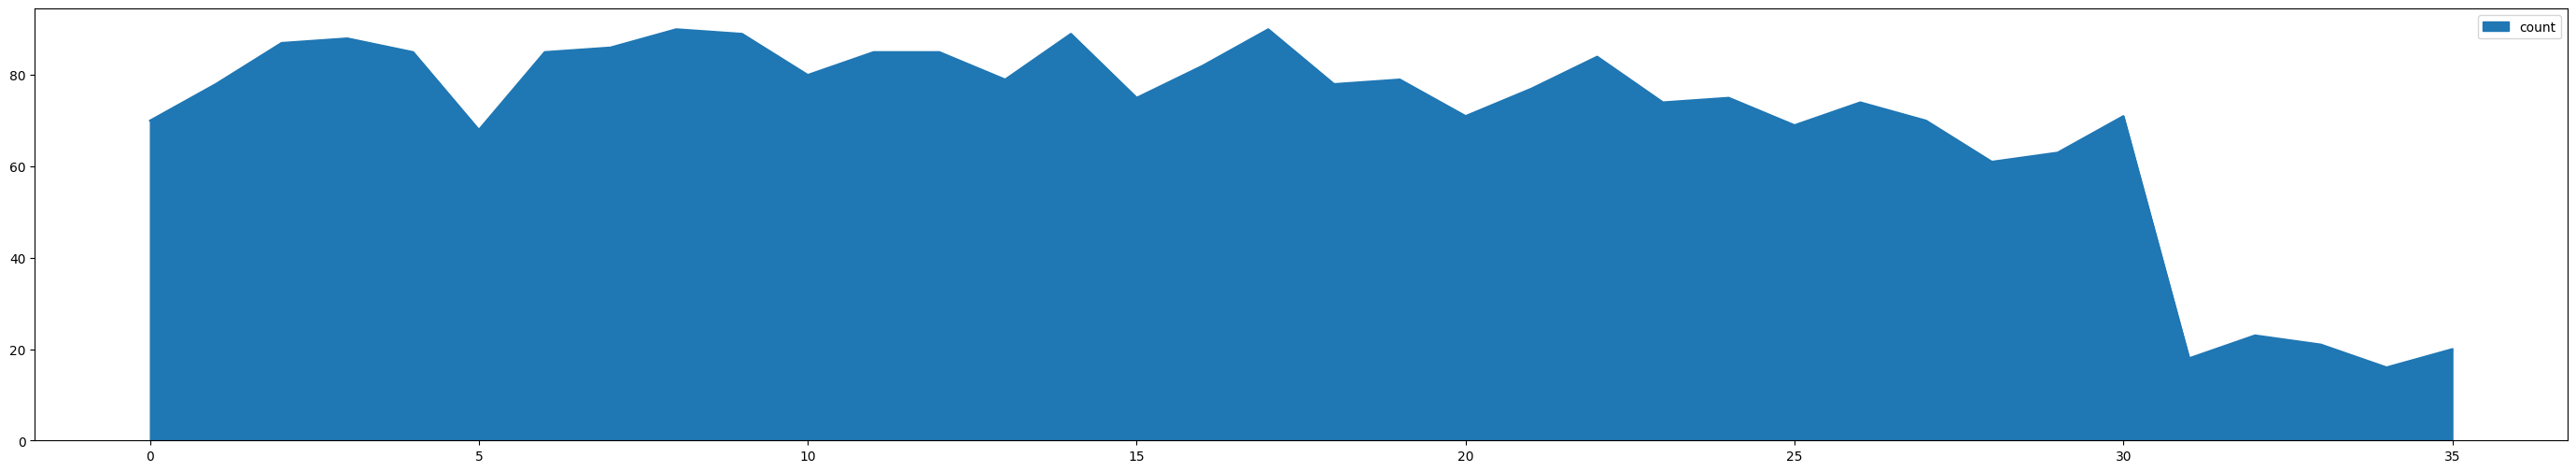

In [657]:
ax = df_fatalities_yearly.plot(kind='area', 
                                   y=[
                                       'count',
                                       ],
                                   figsize=(35, 6)
                                   )
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Fatalities by Year')
ax.legend(['Fatalities'])


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).